# EDA Analysis 
- Game is the most popuar category sold in the store and Game-PS3 is the best-selling product.
- It is observed that there is a peak in total sales around the end of the year.
- For the data available for now, 2015 doesn't seem to be a good year for the store, as there is a sharp drop since the beginning of the year.


In [6]:
from google.colab import files
uploaded = files.upload()

Saving items.csv to items (1).csv


In [0]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv('sales_train_v2.csv')
items = pd.read_csv('items.csv')
item_category = pd.read_csv('item_categories.csv')
# test = pd.read_csv('test.csv')

In [9]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [0]:
train = train.loc[train['item_price'] > 0]
train = train[(train.item_price < 100001) & (train.item_price > 0)]
train = train[(train.item_cnt_day < 1001) & (train.item_cnt_day > 0)]

In [11]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [12]:
# merge the main dataset with items and item_category to get the category of each item
train = pd.merge(train, items, on="item_id")
train = pd.merge(train, item_category, on="item_category_id")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


##Separate Year, Month, Day from the 'date' column

In [14]:
# create a new df with separated day, month and year
revenueByDate = pd.DataFrame(train.groupby('date', as_index=False)['item_price'].sum())
revenueByDate["day"] = revenueByDate.date.str.extract("([0-9][0-9]).", expand = False)
revenueByDate["month"] = revenueByDate.date.str.extract(".([0-9][0-9]).", expand = False)
revenueByDate["year"] = revenueByDate.date.str.extract(".([0-9][0-9][0-9][0-9])", expand =False)
revenueByDate.head()

,date,item_price,day,month,year
0,01.01.2013,1.203604e+06,01,01,2013
1,01.01.2014,1.698281e+06,01,01,2014
2,01.01.2015,2.321680e+06,01,01,2015
3,01.02.2013,2.239281e+06,01,02,2013
4,01.02.2014,3.495028e+06,01,02,2014


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


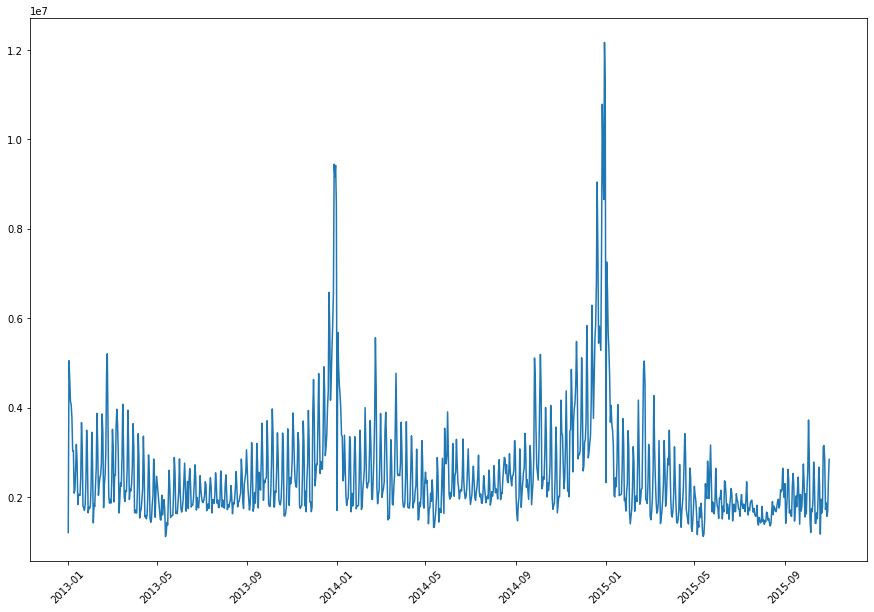

In [15]:
# total sales by date

revenueByDate["date"] = pd.to_datetime(revenueByDate[["year", "month", "day"]])

fig = plt.figure(figsize=(15,10))
plt.plot( "date", "item_price", data = revenueByDate.sort_values(by="date"))
plt.xticks(rotation=45)
plt.show()

From the plot on day, we can see some trend but a little noisy. Let's take a look by month

In [16]:
# total sales by month

revenueByDate["day"] = 1 #set as the first day of each month
revenueByDate['monthlyDate'] = pd.to_datetime(revenueByDate[["year", "month", "day"]])
revenueByMonth = pd.DataFrame(revenueByDate.groupby("monthlyDate", as_index=False)["item_price"].sum())
revenueByMonth.head()

,monthlyDate,item_price
0,2013-01-01,8.179814e+07
1,2013-02-01,7.528300e+07
2,2013-03-01,8.396688e+07
3,2013-04-01,6.121918e+07
4,2013-05-01,5.708693e+07


(array([734869., 734989., 735112., 735234., 735354., 735477., 735599.,
        735719., 735842.]), <a list of 9 Text xticklabel objects>)

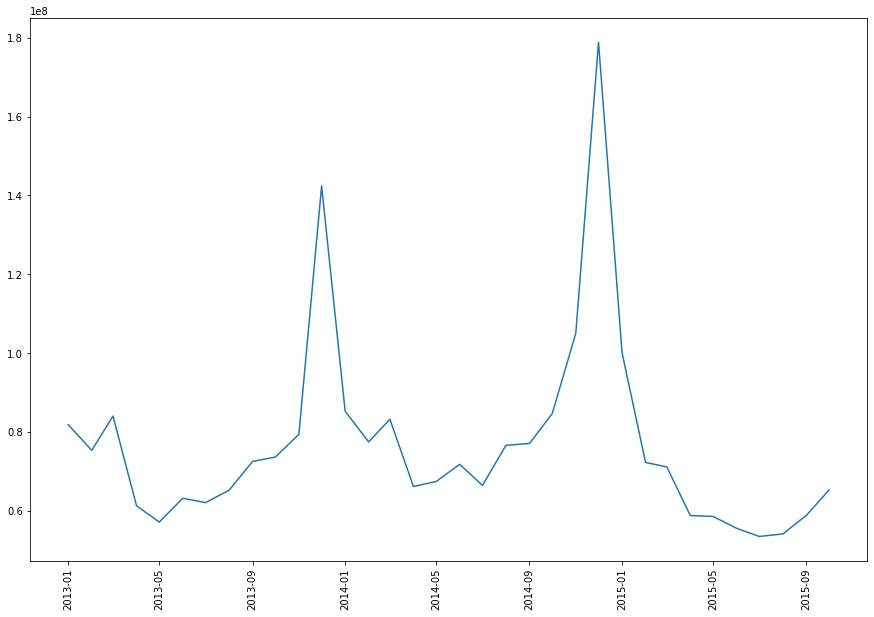

In [17]:
fig = plt.figure(figsize=(15,10))
plt.plot("monthlyDate", "item_price", data = revenueByMonth.sort_values(by="monthlyDate"))
plt.xticks(rotation = 90)

The trend is clearer. It is noticed that around the end of the year, there are peaks.

In [18]:
revenueByMonth.sort_values(by='item_price', ascending=False)[:5]

,monthlyDate,item_price
23,2014-12-01,1.788381e+08
11,2013-12-01,1.424133e+08
22,2014-11-01,1.049724e+08
24,2015-01-01,1.000559e+08
12,2014-01-01,8.521634e+07


## Plot the trend by years

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


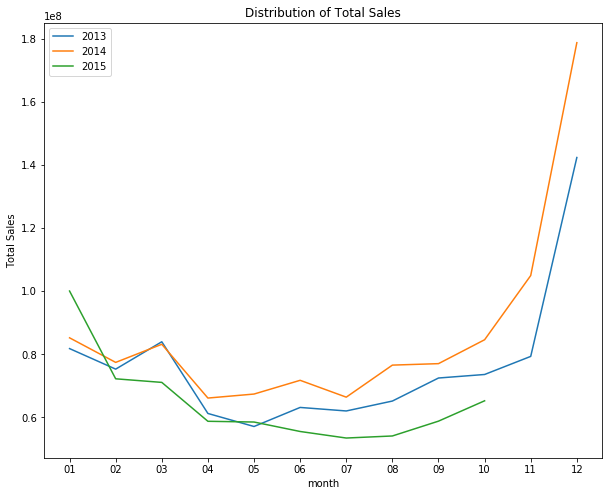

In [19]:
monthlyRev = pd.DataFrame(revenueByDate.groupby(["month", "year"], as_index=False)["item_price"].sum())
# monthlyRev.head()

fig = plt.figure(figsize=(10,8))
plt.xlabel('month')
plt.ylabel("Total Sales")
plt.title("Distribution of Total Sales")
ax1 = fig.add_subplot(111)

ax1.plot(monthlyRev[monthlyRev['year']=='2013'].month, monthlyRev[monthlyRev['year']=='2013']['item_price'], label='2013')
ax1.plot(monthlyRev[monthlyRev['year']=='2014'].month, monthlyRev[monthlyRev['year']=='2014']['item_price'], label='2014')
ax1.plot(monthlyRev[monthlyRev['year']=='2015'].month, monthlyRev[monthlyRev['year']=='2015']['item_price'], label='2015')
ax1.legend(loc=2)

## Analysis on category

In [0]:
# first change the datatype
train["item_id"] = train["item_id"].astype("category")
train["item_name"] = train["item_id"].astype("category")
train["item_category_id"] = train["item_category_id"].astype("category")
train["item_category_name"] = train["item_category_name"].astype("str")

In [21]:
# select categories with high total sales
sales_by_category = train.groupby("item_category_name")["item_price"].sum().reset_index().sort_values("item_price",ascending=False)
sales_by_category

,item_category_name,item_price
19,Игры - PS3,3.134320e+08
20,Игры - PS4,2.195028e+08
23,Игры - XBOX 360,2.161285e+08
30,Игры PC - Стандартные издания,1.750827e+08
12,Игровые консоли - PS4,1.686216e+08
...,...,...
1,Аксессуары - PS2,4.310000e+02
52,Книги - Путеводители,3.000000e+02
0,PC - Гарнитуры/Наушники,2.634000e+02
51,Книги - Познавательная литература,1.290000e+02


In [22]:
# translate all the category from Russian to English

!pip install googletrans
from googletrans import Translator
translator = Translator()

i = 0
for row in sales_by_category["item_category_name"]:
    english_word = translator.translate(row)
    sales_by_category.iloc[i,0] = english_word.text
    i+=1

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15776 sha256=303148876fa3ebd3a9e97601d880ceb0b59940b2ddc593118f05fe0cf65c15f6
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [23]:
sales_by_category

,item_category_name,item_price
19,Games - PS3,3.134320e+08
20,Games - PS4,2.195028e+08
23,Games - XBOX 360,2.161285e+08
30,Games PC - Standard Edition,1.750827e+08
12,Game consoles - PS4,1.686216e+08
...,...,...
1,Accessories - PS2,4.310000e+02
52,Books - Guides,3.000000e+02
0,PC - Headsets / Headphones,2.634000e+02
51,Books - Informative literature,1.290000e+02


Text(0.5, 1.0, 'Sales for each one of the top 10 categories-products')

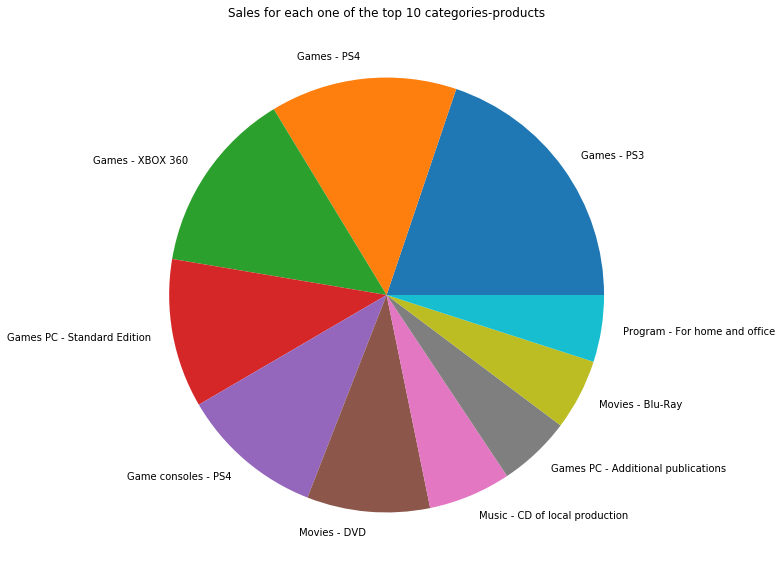

In [24]:
fig = plt.figure(figsize=(15,10))
plt.pie(sales_by_category["item_price"][:10],labels = sales_by_category['item_category_name'][:10])
plt.title("Sales for each one of the top 10 categories-products")

Text(0.5, 1.0, 'Sales for each one of the top 10 categories-products')

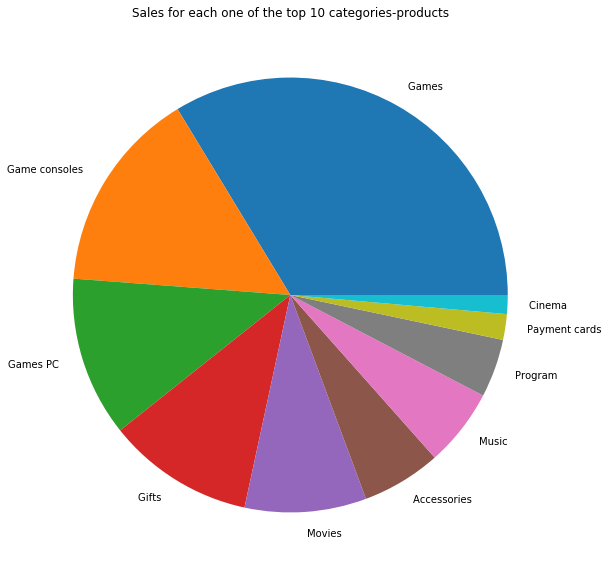

In [25]:
sales_by_category["item_category"] = sales_by_category.item_category_name.str.extract('([A-Za-z\ ]+)', expand=False) 
sales_by_category.head()
temp = sales_by_category.groupby('item_category').sum().reset_index().sort_values("item_price",ascending=False)
# temp

fig = plt.figure(figsize=(15,10))
plt.pie(temp["item_price"][:10],labels = temp['item_category'][:10])
plt.title("Sales for each one of the top 10 categories-products")